In [1]:
import local_models.local_models
import local_models.loggin
import local_models.TLS_models
import local_models.linear_projections
import local_models.utils
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.cluster
from importlib import reload
from ml_battery.utils import cmap
import matplotlib as mpl
import sklearn.datasets
import sklearn.decomposition
import logging
import ml_battery.log
import time
import os
from IPython.display import Markdown as md

logger = logging.getLogger(__name__)

reload(local_models.local_models)
#reload(lm)
#reload(local_models.loggin)
#reload(local_models.TLS_models)
np.warnings.filterwarnings('ignore')


In [2]:
mpl.rcParams['figure.figsize'] = [8.0, 8.0]

In [4]:
K=24
n = 200
noise=.06
SEED = 1
np.random.seed(SEED)
KERNEL=local_models.local_models.GaussianKernel
noisy_moons, c = sklearn.datasets.make_moons(n_samples=n, noise=noise)

In [5]:
project_dir = "../data/moons_randolines/n{:05d}_seed{:05d}_ktricube_01".format(n,SEED)
os.makedirs(project_dir, exist_ok=1)

In [6]:
noisy_moons.shape

(200, 2)

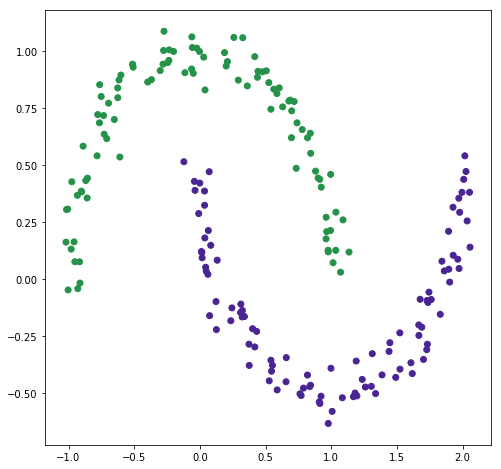

In [7]:
plt.scatter(noisy_moons[:,0], noisy_moons[:,1],c=cmap(c))
plt.show()

In [62]:
mean_models = local_models.local_models.LocalModels(local_models.TLS_models.Mean())
mean_models.fit(noisy_moons)
linear_models = local_models.local_models.LocalModels(local_models.TLS_models.LinearODR_mD(1))
linear_models.fit(noisy_moons)

In [ ]:
BANDWIDTH = 0.3
N_STEPS = 300
ITERATIONS = 3000
fig_dir_iterprojections = os.path.join(project_dir, "mean_projections_iteration_b{:.4f}_g{:05d}".format(BANDWIDTH,N_STEPS))
make_mean_iterprojections_animation(mean_models, noisy_moons, c, fig_dir_iterprojections, BANDWIDTH, grid_steps=N_STEPS, kernel=KERNEL, iterations=ITERATIONS)

3000


In [ ]:
BANDWIDTH = 0.3
N_STEPS = 300
ITERATIONS = 300
THETA = np.pi/4
theta_generator = iter(lambda: THETA, 111111111111111)
fig_dir_meanline_iterprojections = os.path.join(project_dir, "meanline_projections_iteration_b{:.4f}_g{:05d}_t{:08.04f}".format(BANDWIDTH,N_STEPS,THETA))
make_meanline_iterprojections_animation(mean_models, theta_generator, noisy_moons, c, fig_dir_meanline_iterprojections, BANDWIDTH, grid_steps=N_STEPS, kernel=KERNEL, iterations=ITERATIONS)

In [ ]:
BANDWIDTH = 0.3
N_STEPS = 300
ITERATIONS = 300
fig_dir_tlsline_iterprojections = os.path.join(project_dir, "tlsline_projections_iteration_b{:.4f}_g{:05d}".format(BANDWIDTH,N_STEPS))
make_tlsline_iterprojections_animation(linear_models, noisy_moons, c, fig_dir_tlsline_iterprojections, BANDWIDTH, grid_steps=N_STEPS, kernel=KERNEL, iterations=ITERATIONS)

In [ ]:
local_models.utils.imgs2video(os.path.join(fig_dir_iterprojections,"*.png"),
           os.path.join(fig_dir_iterprojections,"out.mp4"), 10)

In [ ]:
md(local_models.utils.video_html(os.path.join(fig_dir_iterprojections, "out.mp4"))